# Testing your model

After trainning your model, it is time to test it. Be sure your test data, is serilized.

In [1]:
import tensorflow as tf
import pickle
from tensorflow.keras.models import load_model
from keras.initializers import glorot_uniform
import os
import datetime
import re
import numpy as np
from tensorflow.keras.models import load_model
from keras.initializers import glorot_uniform

Using TensorFlow backend.


In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
now_datetime  = datetime.datetime.now()
NAME = f"#Results_{now_datetime.day:02d}{now_datetime.month:02d}{now_datetime.year}_{now_datetime.hour:02d}{now_datetime.minute:02d}"


In [3]:
#directory containing the serilized databases, that has the test folder in it
dir_pickle = "database_serialized"

#directory for storing the results of the experiments
dir_results = "results"

#where to find the models

dir_models_save = "models"

#batch size for evaluation and predictions
batch_size = 7
#List of people to be ignored, if you alrady have data about them
ignore_people = []


In [4]:
#Clear memory
from keras.backend import clear_session
clear_session()

In [5]:
def evaluete_model(person,model_name,Xtest,ytest, my_file,show_examples=False):
    #Normalize data
    Xtest_norm = Xtest.astype(np.float16)/255.0
    #Evaluetes the model base on the test
    custom_objects={'GlorotUniform': glorot_uniform()}
    saved_model = load_model(os.path.join(dir_models_save,person,model_name),custom_objects)
    results = saved_model.evaluate(Xtest_norm,ytest,batch_size=batch_size)
    if show_examples:
        predict_random(Xtest,ytest,saved_model,Xtest_norm)
    
    person = re.findall("\d+#",model_name)
    shape = re.findall("[\[](?:(?:\s*\d+,\s*)+\d+\s*)[\]]",model_name)
    my_file.write(f"Model of shape: {shape}\n\
        \t->Acc= {results[1]}\n")

In [6]:
def predict_random(Xtest,ytest,saved_model,Xtest_norm):
    import matplotlib.pyplot as plt
    import cv2
    import numpy as np
    %matplotlib inline
    a = saved_model.predict(Xtest_norm,batch_size=batch_size)
    plt.figure(figsize=(10,10))
    a_round = np.round(a)
    nrows = 4
    ncols = 4
    start = 4
    Xtest_sample = Xtest[start:start +nrows*ncols]
    i = start
    for img in Xtest_sample:
        plt.subplot(nrows,ncols,i-start+1)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Pred: {int(a_round[i])}({ytest[i]})")
        i += 1
    plt.show()

Evaluating: 001
	->Evaluating 001#Face_spoofing300x2_11102019_1615[80, 140, 320][400, 300, 200].h5;
1156/1156 [==============================] - 8s 7ms/sample - loss: 0.1870 - acc: 0.9810


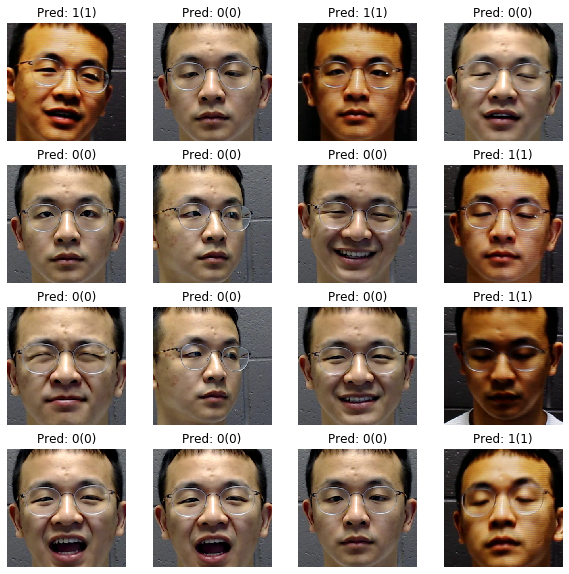

	->Evaluating 001#Face_spoofing300x2_12102019_1549[80, 140, 320][80, 140, 320].h5;
1156/1156 [==============================] - 6s 6ms/sample - loss: 0.0821 - acc: 1.0000


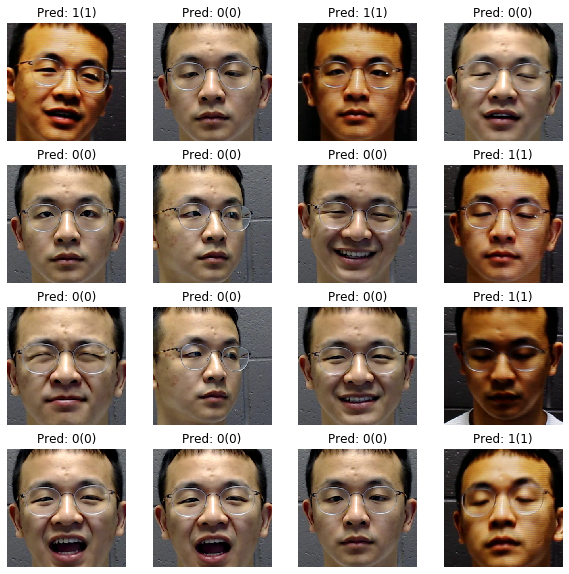

In [7]:
if __name__ =="__main__":
    people = os.listdir(dir_models_save)
    my_file = open(os.path.join(dir_results,f"{NAME}.txt") ,"w")
    for person in people:
        if person in ignore_people:
            print(f"Ignoring {person}...")
            continue
        #Loads The test of the respective person
        print(f"Evaluating: {person}")       
        pickle_in = open(os.path.join(dir_pickle,person,f"X{person}Test.pickle"),"rb")
        Xtest = pickle.load(pickle_in)
        pickle_in.close()
        pickle_in = open(os.path.join(dir_pickle,person,f"y{person}Test.pickle"),"rb")
        ytest = pickle.load(pickle_in)
        pickle_in.close()
        models = os.listdir(os.path.join(dir_models_save,person))
        my_file.write("=======================================Results of person: 001=================================================\n")
        my_file.write(f"Test examples: {len(ytest)}")
        for model in models:
            print(f"\t->Evaluating {model};")
            evaluete_model(person,model,Xtest,ytest,my_file,show_examples=True)
        my_file.write("\n=============================================END================================================================")
    my_file.close()
    #kills the kernel to free-up memory on GPU, also avoiding collisions with othhers scripts 
    #comment the line below, if you want to keep the variables and buffers

In [ ]:
if __name__ =="__main__":
    os._exit(00)